In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

netflix_data = pd.DataFrame({
    'watch_hours': [20, 5, 30, 50, 12, 8, 45, 23, 10, 60],
    'tenure': [3, 1, 10, 15, 2, 1, 12, 6, 1, 18],
    'monthly_fee': [15, 20, 10, 8, 18, 25, 9, 13, 22, 7],
    'churn': [1, 1, 0, 0, 1, 1, 0, 0, 1, 0]
})

hulu_data = pd.DataFrame({
    'tenure': [12, 24, 5, 36, 3, 48, 2, 6, 30, 40],
    'MonthlyCharges': [20, 25, 50, 15, 45, 10, 55, 40, 30, 20],
    'Contract_Two year': [0, 1, 0, 0, 1, 0, 1, 0, 0, 1],
    'PaymentMethod_Credit card': [0, 0, 0, 1, 0, 1, 0, 1, 0, 1],
    'churn': [1, 0, 1, 0, 1, 0, 1, 0, 0, 0]
})

X_netflix = netflix_data[['watch_hours', 'tenure', 'monthly_fee']]
y_netflix = netflix_data['churn']
X_train_netflix, X_test_netflix, y_train_netflix, y_test_netflix = train_test_split(X_netflix, y_netflix, test_size=0.3, random_state=42)

X_hulu = hulu_data[['tenure', 'MonthlyCharges', 'Contract_Two year', 'PaymentMethod_Credit card']]
y_hulu = hulu_data['churn']
X_train_hulu, X_test_hulu, y_train_hulu, y_test_hulu = train_test_split(X_hulu, y_hulu, test_size=0.3, random_state=42)


In [27]:
from sklearn.linear_model import LogisticRegression

lr_netflix = LogisticRegression()
lr_netflix.fit(X_train_netflix, y_train_netflix)

lr_hulu = LogisticRegression()
lr_hulu.fit(X_train_hulu, y_train_hulu)


LogisticRegression()

In [29]:
print("Netflix Feature Importance (Logistic Regression):")
for feature, coef in zip(['watch_hours', 'tenure', 'monthly_fee'], lr_netflix.coef_[0]):
    print(f"{feature}: {coef:.2f}")
print("\nHulu Feature Importance (Logistic Regression):")
for feature, coef in zip(['tenure', 'MonthlyCharges', 'Contract_Two year', 'PaymentMethod_Credit card'], lr_hulu.coef_[0]):
    print(f"{feature}: {coef:.2f}")

Netflix Feature Importance (Logistic Regression):
watch_hours: -0.47
tenure: -0.46
monthly_fee: 0.31

Hulu Feature Importance (Logistic Regression):
tenure: -0.20
MonthlyCharges: -0.04
Contract_Two year: 0.23
PaymentMethod_Credit card: -0.71


In [31]:
from sklearn.metrics import classification_report

y_pred_netflix = lr_netflix.predict(X_test_netflix)
print("\nNetflix Model Evaluation:")
print(classification_report(y_test_netflix, y_pred_netflix, zero_division=0))

y_pred_hulu = lr_hulu.predict(X_test_hulu)
print("\nHulu Model Evaluation:")
print(classification_report(y_test_hulu, y_pred_hulu, zero_division=0))


Netflix Model Evaluation:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Hulu Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [33]:
y_pred_netflix = lr_netflix.predict(X_test_netflix)
y_pred_hulu = lr_hulu.predict(X_test_hulu)

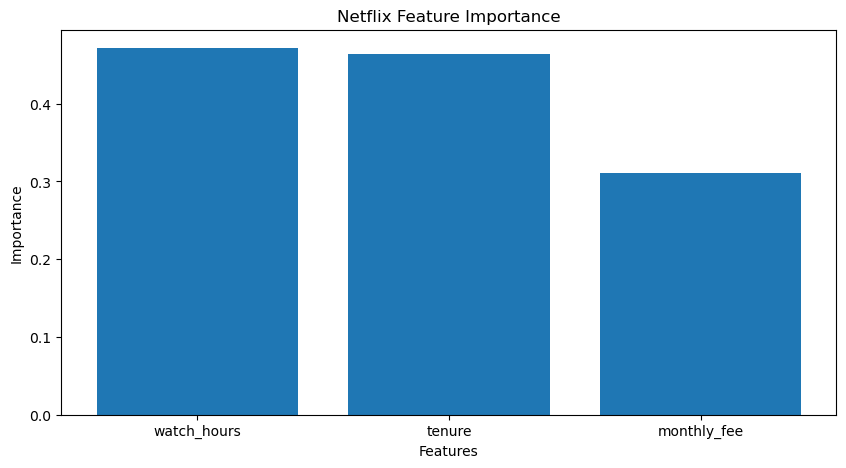

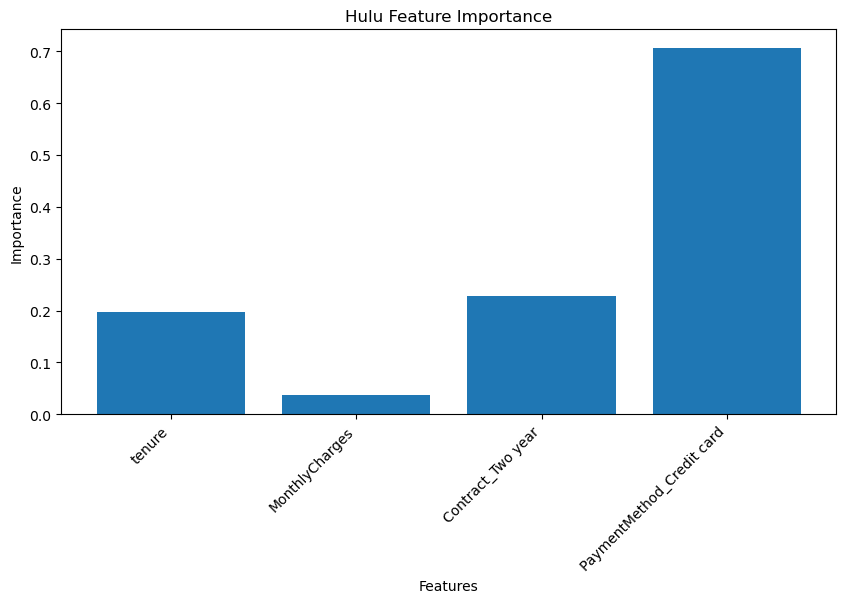

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(['watch_hours', 'tenure', 'monthly_fee'], abs(lr_netflix.coef_[0]))
plt.title("Netflix Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(['tenure', 'MonthlyCharges', 'Contract_Two year', 'PaymentMethod_Credit card'], abs(lr_hulu.coef_[0]))
plt.title("Hulu Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()